# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading data

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df.columns = columns
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [6]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [7]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df_U = df.copy()
df_U.shape

(699, 11)

# Implementing the GTRS three-way clustering algorithm

## Initialize $α = 1.0$, $β = 0.0$

In [ ]:
alpha_initial = 1
beta_initial = 0

## Divide U into C and M

> C is the set of objects with no missing values and M is the set of objects with missing values. 

In [9]:
df_C = df_U[(df_U.notna()).all(axis=1)]
df_C.shape

(683, 11)

In [10]:
df_C.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [11]:
df_M = df_U[(df_U.isna()).any(axis=1)]
df_M.shape

(16, 11)

In [12]:
df_M.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2


In [13]:
df_M.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

## Apply K-mean clustering on C

In [14]:
k = 2

In [15]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(df_C.iloc[:, 1:-1])
k_means = pd.DataFrame(kmeans.labels_, columns=['k-means'])
k_means.head()

,k-means
0,1
1,0
2,1
3,0
4,1


In [16]:
k_means.shape

(683, 1)

In [17]:
df_C_k_means = pd.concat([df_C.reset_index(drop=True), k_means], axis=1)
df_C_k_means.rename(index=lambda x : 'o_' + str(x + 1), inplace=True)
df_C_k_means

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,5,1,1,1,2,1.0,3,1,1,2,1
o_2,1002945,5,4,4,5,7,10.0,3,2,1,2,0
o_3,1015425,3,1,1,1,2,2.0,3,1,1,2,1
o_4,1016277,6,8,8,1,3,4.0,3,7,1,2,0
o_5,1017023,4,1,1,3,2,1.0,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
o_679,776715,3,1,1,1,3,2.0,1,1,1,2,1
o_680,841769,2,1,1,1,2,1.0,1,1,1,2,1
o_681,888820,5,10,10,3,7,3.0,8,10,2,4,0
o_682,897471,4,8,6,4,3,4.0,10,6,1,4,0


In [18]:
mpl.rcParams['figure.figsize'] = [16.0, 10.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['figure.titlesize'] = 'large'

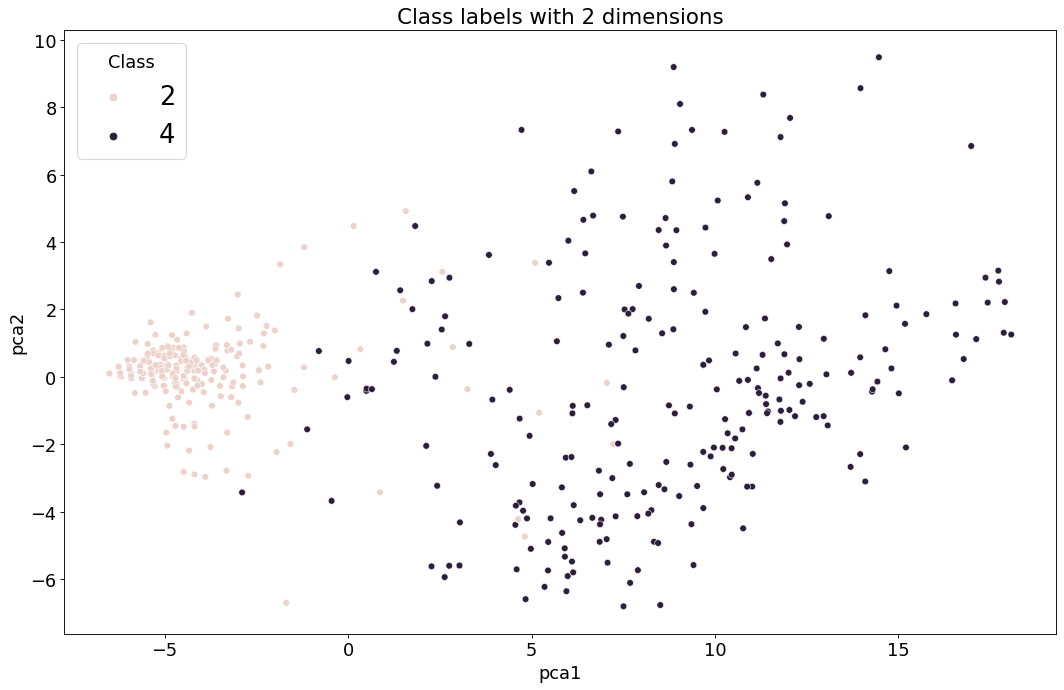

In [19]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_C_k_means.iloc[:, 1 : 10])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'], index=df_C_k_means.index)

sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'Class'], data=results)
plt.title('Class labels with 2 dimensions')
plt.show()

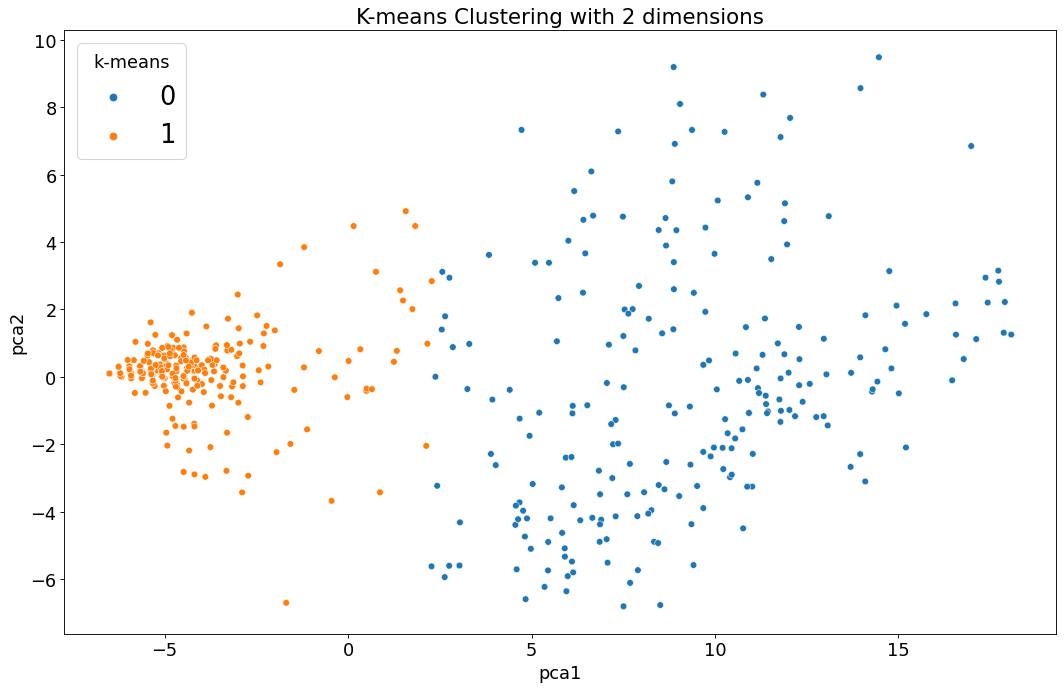

In [20]:
sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'k-means'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

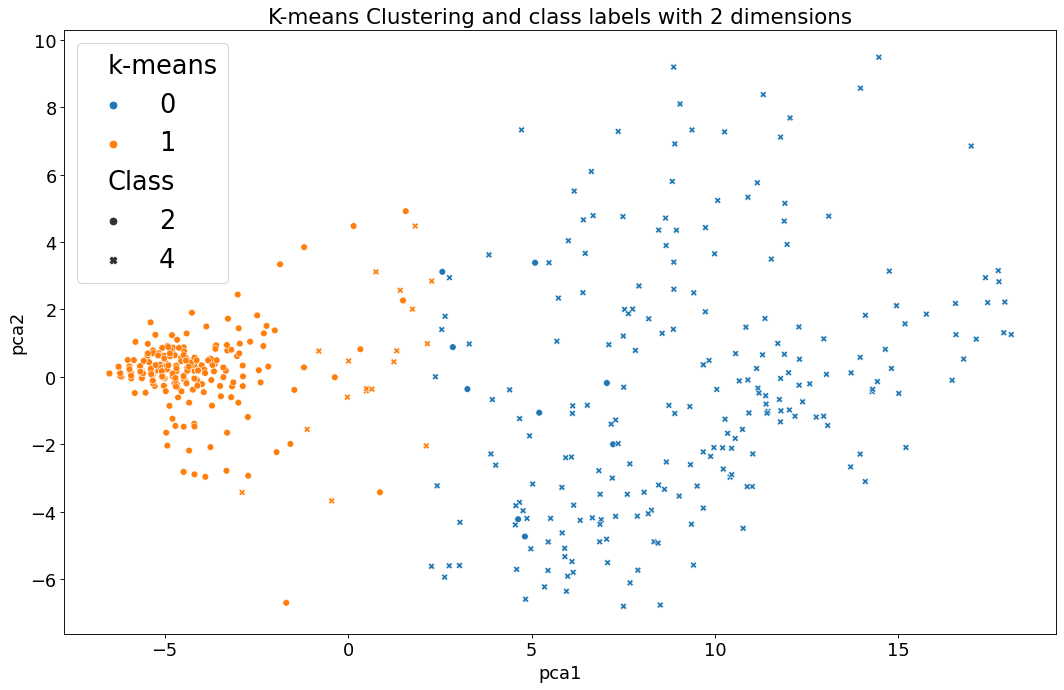

In [21]:
sns.scatterplot(x="pca1", y="pca2", hue=df_C_k_means.loc[: , 'k-means'], data=results, style=df_C_k_means.loc[: , 'Class'])
plt.title('K-means Clustering and class labels with 2 dimensions')
plt.show()

## Randomly remove values from C by following the percentage of missing values in M

In [22]:
missing_values_number = df_M.isnull().sum().sum()
missing_values_number


16

In [23]:
total_values_number = df_M.iloc[:, 1:].shape[0] * df_M.iloc[:, 1:-1].shape[1]
total_values_number

144

In [24]:
missing_value_ratio = missing_values_number/total_values_number
missing_value_ratio

0.1111111111111111

In [25]:
mask = np.random.choice([True, False], size=df_C_k_means.iloc[:, 1:-2].shape, p=[missing_value_ratio,1-missing_value_ratio])
df_C_k_means.iloc[:, 1:-2].mask(mask)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
o_1,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0
o_2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
o_3,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN
o_4,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0
o_5,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
o_679,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
o_680,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
o_681,5.0,NaN,10.0,3.0,7.0,3.0,8.0,10.0,2.0
o_682,4.0,8.0,NaN,NaN,3.0,4.0,10.0,6.0,1.0


In [26]:
new_df_C = pd.concat([df_C_k_means.iloc[:, 0], df_C_k_means.iloc[:, 1:-2].mask(mask), df_C_k_means.iloc[:, -2:]], axis=1)
new_df_C.shape

(683, 12)

## Divide C into Uc and Um

> Uc is the set of objects with no missing values and Um is the set of objects with simulated missing values.

In [27]:
df_Uc= new_df_C[(new_df_C.notna()).all(axis=1)]
df_Uc.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
k-means                        0
dtype: int64

In [28]:
df_Uc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_2,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2,0
o_6,1017122,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4,0
o_7,1018099,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2,1
o_9,1033078,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2,1
o_18,1049815,4.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2,1


In [29]:
df_Uc.shape

(239, 12)

In [30]:
df_Um = new_df_C[(new_df_C.isna()).any(axis=1)]
df_Um.isnull().sum()

Sample code number              0
Clump Thickness                79
Uniformity of Cell Size        79
Uniformity of Cell Shape       77
Marginal Adhesion              80
Single Epithelial Cell Size    72
Bare Nuclei                    69
Bland Chromatin                75
Normal Nucleoli                74
Mitoses                        65
Class                           0
k-means                         0
dtype: int64

In [31]:
df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,2,1
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2,1
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,2,0
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,2,1
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,2,1


In [32]:
df_Um.shape

(444, 12)

In [33]:
df_Um

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,2,1
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2,1
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,2,0
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,2,1
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
o_676,695091,NaN,10.0,10.0,5.0,NaN,5.0,4.0,4.0,1.0,4,0
o_677,714039,3.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1
o_681,888820,5.0,NaN,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4,0
o_682,897471,4.0,8.0,NaN,NaN,3.0,4.0,10.0,6.0,1.0,4,0


In [34]:
new_df_Um = df_Um.copy()

for index_Uc in df_Uc.index:
    distance_list = []
    for index_Um in df_Um.index:
        result = 0
        row_Um = df_Um.loc[index_Um, 'Clump Thickness' : 'Mitoses']
        for attribute in row_Um.index:
            if pd.notna(row_Um[attribute]):
                result += math.pow(row_Um[attribute] - df_Uc.loc[index_Uc, attribute], 2)
        distance_list.append(math.sqrt(result))
    new_df_Um = pd.concat([new_df_Um, pd.DataFrame(distance_list, index = df_Um.index, columns=[index_Uc])], axis=1)

In [35]:
new_df_Um.shape

(444, 251)

In [36]:
new_df_Um.iloc[:, 12:]

,o_2,o_6,o_7,o_9,o_18,o_19,o_20,o_28,o_33,o_34,...,o_658,o_659,o_660,o_662,o_670,o_673,o_674,o_678,o_679,o_680
o_1,11.832160,18.788294,9.000000,4.472136,0.000000,13.564660,0.000000,1.000000,1.000000,1.414214,...,3.162278,1.000000,3.605551,2.000000,2.000000,2.000000,7.280110,1.414214,2.449490,2.000000
o_3,11.313708,19.924859,8.246211,2.449490,1.414214,14.662878,3.162278,1.732051,1.732051,1.732051,...,3.872983,2.449490,3.872983,3.000000,3.000000,2.449490,3.000000,1.414214,2.236068,2.449490
o_4,10.488088,10.000000,14.000000,13.416408,12.165525,9.643651,12.000000,12.688578,12.649111,11.874342,...,10.535654,13.038405,10.908712,12.206556,13.152946,12.328828,14.899664,12.449900,12.288206,12.806248
o_5,11.401754,18.574176,9.695360,4.898979,2.000000,14.247807,2.828427,2.828427,2.236068,2.449490,...,3.316625,3.605551,3.605551,2.236068,3.605551,2.000000,7.874008,2.449490,2.645751,2.828427
o_8,10.954451,19.570386,9.110434,4.582576,2.236068,15.264338,4.123106,1.414214,1.414214,1.414214,...,4.123106,1.732051,3.464102,3.741657,2.449490,3.000000,7.416198,2.000000,2.645751,2.236068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_676,10.099505,8.246211,14.594520,15.099669,14.282857,7.348469,14.282857,14.387495,14.035669,13.784049,...,12.767145,14.387495,12.922848,14.560220,14.560220,14.560220,16.155494,14.422205,14.317821,14.560220
o_677,11.135529,17.663522,9.433981,4.123106,2.236068,13.416408,3.605551,1.414214,2.236068,1.414214,...,2.449490,2.236068,3.162278,2.000000,2.000000,1.000000,7.280110,1.414214,1.414214,1.000000
o_681,13.379088,9.695360,16.792856,16.186414,14.899664,14.071247,14.899664,15.524175,15.066519,14.798649,...,14.798649,15.748016,14.177447,15.652476,16.155494,15.684387,17.204651,15.329710,15.394804,15.937377
o_682,11.575837,8.602325,13.000000,13.601471,11.532563,11.661904,11.704700,12.328828,11.704700,12.206556,...,11.874342,12.529964,12.845233,12.884099,13.190906,12.845233,14.933185,12.247449,12.649111,13.000000


In [37]:
n_neighbours = round(df_Uc.shape[0] / 3)
n_neighbours

80

In [38]:
c1_list = []
c2_list = []
for index_Um in new_df_Um.index:
    c1_num = 0
    c2_num = 0
    row_Um = new_df_Um.loc[index_Um, :].iloc[ 12:].sort_values(ascending=True)[ : n_neighbours]
    for i in row_Um.index:
        if df_Uc.loc[i, 'k-means'] == 0:
            c1_num += 1
        else:
            c2_num += 1
    c1_list.append(c1_num)
    c2_list.append(c2_num)

In [39]:
new_df_Um = pd.concat([new_df_Um, pd.DataFrame(c1_list, index = new_df_Um.index, columns=['e_c1']), pd.DataFrame(c2_list, index = new_df_Um.index, columns=['e_c2'])], axis=1)

In [40]:
new_df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,...,o_660,o_662,o_670,o_673,o_674,o_678,o_679,o_680,e_c1,e_c2
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,...,3.605551,2.000000,2.000000,2.000000,7.280110,1.414214,2.449490,2.000000,0,80
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,...,3.872983,3.000000,3.000000,2.449490,3.000000,1.414214,2.236068,2.449490,0,80
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,...,10.908712,12.206556,13.152946,12.328828,14.899664,12.449900,12.288206,12.806248,62,18
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,...,3.605551,2.236068,3.605551,2.000000,7.874008,2.449490,2.645751,2.828427,0,80
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,...,3.464102,3.741657,2.449490,3.000000,7.416198,2.000000,2.645751,2.236068,0,80


In [41]:
new_df_Um.shape

(444, 253)

In [42]:
new_df_Um.iloc[:, -2:]

,e_c1,e_c2
o_1,0,80
o_3,0,80
o_4,62,18
o_5,0,80
o_8,0,80
...,...,...
o_676,70,10
o_677,0,80
o_681,71,9
o_682,63,17


In [43]:
new_df_Um.iloc[:, -2:] = new_df_Um.iloc[:, -2:] / n_neighbours
new_df_Um.iloc[:, -2:]

,e_c1,e_c2
o_1,0.0000,1.0000
o_3,0.0000,1.0000
o_4,0.7750,0.2250
o_5,0.0000,1.0000
o_8,0.0000,1.0000
...,...,...
o_676,0.8750,0.1250
o_677,0.0000,1.0000
o_681,0.8875,0.1125
o_682,0.7875,0.2125


In [44]:
new_df_Um.iloc[:, [11, -2, -1]]

,k-means,e_c1,e_c2
o_1,1,0.0000,1.0000
o_3,1,0.0000,1.0000
o_4,0,0.7750,0.2250
o_5,1,0.0000,1.0000
o_8,1,0.0000,1.0000
...,...,...,...
o_676,0,0.8750,0.1250
o_677,1,0.0000,1.0000
o_681,0,0.8875,0.1125
o_682,0,0.7875,0.2125


## Calculate the utilities of players by using these equations below:

$Accuracy(α,\ β) = \frac{Correctly\ clustered\ objects}{Total\ clustered\ objects}$

$Generality(α,\ β) = \frac{Total\ clustered\ objects}{Total\ objects\ in\ U}$

In [46]:
def calculator(alpha, beta):
    df = new_df_Um.iloc[:, [11, -2, -1]].copy()
    df['Inside_c1'] = ((df['e_c1'] >= alpha) & (df['e_c2'] <= beta))
    df['Inside_c2'] = ((df['e_c2'] >= alpha) & (df['e_c1'] <= beta))
    df['correctly_clustered'] = (((df['Inside_c1']==True) & (df['k-means']==0)) | ((df['Inside_c2']==True) & (df['k-means']==1)))

    total_objects = df.shape[0]
    total_clustered_objects = (df['Inside_c1']==True).sum() + (df['Inside_c2']==True).sum()
    correctly_clustered_objects = (df['correctly_clustered']==True).sum()

    accuracy = correctly_clustered_objects / total_clustered_objects
    generality = total_clustered_objects / total_objects
    
    return accuracy, generality

accuracy, generality = calculator(alpha_initial, beta_initial)

print(accuracy, generality)

1.0 0.6126126126126126


## Populate the payoff table with calculated values

In [47]:
alpha_1 = 0.975
alpha_2 = 0.95
beta_1 = 0.025
beta_2 = 0.05

In [48]:
df = pd.DataFrame(index=['alpha-', 'beta+', 'alpha-beta+'], columns=['alpha-', 'beta+', 'alpha-beta+']).fillna(str(alpha_initial) + ', ' + str(beta_initial))
df

,alpha-,beta+,alpha-beta+
alpha-,"1, 0","1, 0","1, 0"
beta+,"1, 0","1, 0","1, 0"
alpha-beta+,"1, 0","1, 0","1, 0"


In [49]:
for index in df.index:
    for column in df.columns:
        if index in ['alpha-', 'alpha-beta+']:
            if column in ['alpha-', 'alpha-beta+']:
                df.loc[index, column] = str(alpha_2) + ', ' + df.loc[index, column].split(', ')[1]
            else:
                df.loc[index, column] = str(alpha_1) + ', ' + df.loc[index, column].split(', ')[1]
        else:
            if column in ['alpha-', 'alpha-beta+']:
                df.loc[index, column] = str(alpha_1) + ', ' + df.loc[index, column].split(', ')[1]
for index in df.index:
    for column in df.columns:                 
        if index in ['beta+', 'alpha-beta+']:
            if column in ['beta+', 'alpha-beta+']:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_2)
            else:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_1)
        else:
            if column in ['beta+', 'alpha-beta+']:
                df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(beta_1)
df

,alpha-,beta+,alpha-beta+
alpha-,"0.95, 0","0.975, 0.025","0.95, 0.025"
beta+,"0.975, 0.025","1, 0.05","0.975, 0.05"
alpha-beta+,"0.95, 0.025","0.975, 0.05","0.95, 0.05"


## Calculate equilibrium in a payoff table by using these equations below:

$For\ Accuracy: {\forall}_{{S}_{m}} \in {S}_{A},\ {u}_{A}({S}_{m}, {S}_{n}) \geq {u}_{A}({S}’_{m},\ {S}_{n}),\ where\ ({S}’_{m} \neq {S}_{m}).$

$For\ Generality: {\forall}_{{S}_{n}} \in {S}_{G},\ {u}_{G}({S}_{m}, {S}_{n}) \geq {u}_{G}({S}_{m},\ {S}’_{n}),\ where\ ({S}’_{n} \neq {S}_{n}).$

In [50]:
best_performance = 0
accuracy_threshold = 0.9

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        result = calculator(float(df.iloc[i,j].split(', ')[0]), float(float(df.iloc[i,j].split(', ')[1])))
        df.iloc[i,j] = df.iloc[i,j].split(', ')[0] + ', ' + df.iloc[i,j].split(', ')[1] + ', ' + str(round(result[0], 3)) + ', ' + str(round(result[1], 3))
        if ((result[0] >= accuracy_threshold) & (best_performance < (result[0] + result[1]))):
            best_performance = result[0] + result[1]
            best_accuracy = result[0]
            best_generality = result[1]
            best_accuracy_parameter = df.index[i]
            best_generality_parameter = df.columns[j]
df

,alpha-,beta+,alpha-beta+
alpha-,"0.95, 0, 1.0, 0.613","0.975, 0.025, 1.0, 0.667","0.95, 0.025, 1.0, 0.667"
beta+,"0.975, 0.025, 1.0, 0.667","1, 0.05, 1.0, 0.613","0.975, 0.05, 1.0, 0.667"
alpha-beta+,"0.95, 0.025, 1.0, 0.667","0.975, 0.05, 1.0, 0.667","0.95, 0.05, 1.0, 0.732"


In [51]:
print(f'Best performance: {best_performance}')
print(f'Best accuracy: {best_accuracy}')
print(f'Best generality: {best_generality}')
print(f'Best accuracy parameter: {best_accuracy_parameter}')
print(f'Best generality parameter: {best_generality_parameter}')

Best performance: 1.731981981981982
Best accuracy: 1.0
Best generality: 0.7319819819819819
Best accuracy parameter: alpha-beta+
Best generality parameter: alpha-beta+


In [52]:
c = 1.05

alpha_1 = alpha_initial - (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
alpha_2 = alpha_initial - c * (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
beta_1 = beta_initial - (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
beta_2 = beta_initial - c * (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])

## Repeat

In [53]:
def threshold_iterator(alpha_initial, beta_initial, alpha_1, alpha_2, beta_1, beta_2, c):
    df = pd.DataFrame(index=['alpha-', 'beta+', 'alpha-beta+'], columns=['alpha-', 'beta+', 'alpha-beta+']).fillna(str(alpha_initial) + ', ' + str(beta_initial))
    for index in df.index:
        for column in df.columns:
            if index in ['alpha-', 'alpha-beta+']:
                if column in ['alpha-', 'alpha-beta+']:
                    df.loc[index, column] = str(round(alpha_2, 3)) + ', ' + df.loc[index, column].split(', ')[1]
                else:
                    df.loc[index, column] = str(round(alpha_1, 3)) + ', ' + df.loc[index, column].split(', ')[1]
            else:
                if column in ['alpha-', 'alpha-beta+']:
                    df.loc[index, column] = str(round(alpha_1, 3)) + ', ' + df.loc[index, column].split(', ')[1]
    for index in df.index:
        for column in df.columns:                 
            if index in ['beta+', 'alpha-beta+']:
                if column in ['beta+', 'alpha-beta+']:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_2, 3))
                else:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_1, 3))
            else:
                if column in ['beta+', 'alpha-beta+']:
                    df.loc[index, column] = df.loc[index, column].split(', ')[0] + ', ' + str(round(beta_1, 3))

    best_performance = 0
    accuracy_threshold = 0.9
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            result = calculator(float(df.iloc[i,j].split(', ')[0]), float(float(df.iloc[i,j].split(', ')[1])))
            df.iloc[i,j] = df.iloc[i,j].split(', ')[0] + ', ' + df.iloc[i,j].split(', ')[1] + ', ' + str(round(result[0], 3)) + ', ' + str(round(result[1], 3))
            if ((result[0] >= accuracy_threshold) & (best_performance < (result[0] + result[1]))):
                best_performance = result[0] + result[1]
                best_accuracy = round(result[0], 3)
                best_generality = round(result[1], 3)
                alpha_new = float(df.iloc[i,j].split(', ')[0])
                beta_new = float(df.iloc[i,j].split(', ')[1])
    print(df)

    alpha_1 = alpha_initial - (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    alpha_2 = alpha_initial - c * (alpha_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    beta_1 = beta_initial - (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
    beta_2 = beta_initial - c * (beta_initial * (best_generality) - calculator(alpha_initial, beta_initial)[1])
     
    return alpha_new, beta_new, alpha_1, alpha_2, beta_1, beta_2, best_accuracy, best_generality

In [54]:
alpha_initial = 1
beta_initial = 0

alpha_1 = 0.975
alpha_2 = 0.95
beta_1 = 0.025
beta_2 = 0.05

alpha_list = []
beta_list = []
accuracy_list = []
generality_list = []

accuracy, generality = calculator(alpha_initial, beta_initial)
for i in range(5):
    if ((accuracy <= generality) | (alpha_initial <= 0.5) | (beta_initial >= 0.5)):
        break
    else:
        results = threshold_iterator(alpha_initial, beta_initial, alpha_1, alpha_2, beta_1, beta_2, c = 2)
        alpha_list.append(alpha_initial)
        beta_list.append(beta_initial)
    
        alpha_initial = results[0]
        beta_initial = results[1]

        alpha_1 = results[2]
        alpha_2 = results[3]
        beta_1 = results[4]
        beta_2 = results[5]
        accuracy = results[6]
        generality = results[7]
    
        accuracy_list.append(accuracy)
        generality_list.append(generality)


print(alpha_list)
print(beta_list)
print(accuracy_list)
print(generality_list)

                               alpha-                     beta+  \
alpha-            0.95, 0, 1.0, 0.613  0.975, 0.025, 1.0, 0.667   
beta+        0.975, 0.025, 1.0, 0.667       1, 0.05, 1.0, 0.613   
alpha-beta+   0.95, 0.025, 1.0, 0.667   0.975, 0.05, 1.0, 0.667   

                         alpha-beta+  
alpha-       0.95, 0.025, 1.0, 0.667  
beta+        0.975, 0.05, 1.0, 0.667  
alpha-beta+   0.95, 0.05, 1.0, 0.732  
                                 alpha-                     beta+  \
alpha-          0.761, 0.05, 1.0, 0.732  0.881, 0.613, 1.0, 0.806   
beta+          0.881, 0.613, 1.0, 0.806   0.95, 1.225, 1.0, 0.732   
alpha-beta+  0.761, 0.613, 0.995, 0.896  0.881, 1.225, 1.0, 0.806   

                            alpha-beta+  
alpha-       0.761, 0.613, 0.995, 0.896  
beta+          0.881, 1.225, 1.0, 0.806  
alpha-beta+  0.761, 1.225, 0.995, 0.896  
[1, 0.95]
[0, 0.05]
[1.0, 0.995]
[0.732, 0.896]


In [55]:
final_df_Um = new_df_Um.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -2, -1]].copy()
final_df_Um

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,2,1,0.0000,1.0000
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2,1,0.0000,1.0000
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,2,0,0.7750,0.2250
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,2,1,0.0000,1.0000
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,2,1,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_676,695091,NaN,10.0,10.0,5.0,NaN,5.0,4.0,4.0,1.0,4,0,0.8750,0.1250
o_677,714039,3.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1,0.0000,1.0000
o_681,888820,5.0,NaN,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4,0,0.8875,0.1125
o_682,897471,4.0,8.0,NaN,NaN,3.0,4.0,10.0,6.0,1.0,4,0,0.7875,0.2125


In [56]:
accuracy = 0
generality = 0
accuracy_threshold = 0.9
for i in range(len(alpha_list)):
    if (accuracy_list[i] >= accuracy_threshold) & (accuracy + generality < (accuracy_list[i] + generality_list[i])):
        alpha_final = alpha_list[i]
        beta_final = beta_list[i]
        accuracy_final = accuracy_list[i]
        generality = generality_list[i]


print(f'Final alpha: {alpha_final}')
print(f'Final beta: {beta_final}')
print(f'Final accuracy: {accuracy_final}')
print(f'Final generality: {generality}')

Final alpha: 0.95
Final beta: 0.05
Final accuracy: 0.995
Final generality: 0.896


In [57]:
final_df_Um['Inside_c1'] = ((final_df_Um['e_c1'] >= alpha_final) & (final_df_Um['e_c2'] <= beta_final))
final_df_Um['Inside_c2'] = ((final_df_Um['e_c2'] >= alpha_final) & (final_df_Um['e_c1'] <= beta_final))
final_df_Um['Partial_c1_c2'] = final_df_Um.apply(lambda x: True if ((x['Inside_c1'] == False) & (x['Inside_c2'] == False)) else False, axis=1)

final_df_Um


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,2,1,0.0000,1.0000,False,True,False
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2,1,0.0000,1.0000,False,True,False
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,2,0,0.7750,0.2250,False,False,True
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,2,1,0.0000,1.0000,False,True,False
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,2,1,0.0000,1.0000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
o_676,695091,NaN,10.0,10.0,5.0,NaN,5.0,4.0,4.0,1.0,4,0,0.8750,0.1250,False,False,True
o_677,714039,3.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,2,1,0.0000,1.0000,False,True,False
o_681,888820,5.0,NaN,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4,0,0.8875,0.1125,False,False,True
o_682,897471,4.0,8.0,NaN,NaN,3.0,4.0,10.0,6.0,1.0,4,0,0.7875,0.2125,False,False,True


In [58]:
final_df_Um['Three-way GTRS'] = final_df_Um['Inside_c1'].astype(str) + final_df_Um['Inside_c2'].astype(str) + final_df_Um['Partial_c1_c2'].astype(str)
final_df_Um['Three-way GTRS'].replace('TrueFalseFalse', 1, inplace=True)
final_df_Um['Three-way GTRS'].replace('FalseTrueFalse', 2, inplace=True)
final_df_Um['Three-way GTRS'].replace('FalseFalseTrue', 0, inplace=True)
final_df_Um['Three-way GTRS'].unique()

array([2, 0, 1])

In [59]:
final_df_Um.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2,Three-way GTRS
o_1,1000025,NaN,1.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,2,1,0.000,1.000,False,True,False,2
o_3,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,NaN,2,1,0.000,1.000,False,True,False,2
o_4,1016277,6.0,8.0,8.0,NaN,3.0,4.0,3.0,7.0,1.0,2,0,0.775,0.225,False,False,True,0
o_5,1017023,4.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0,2,1,0.000,1.000,False,True,False,2
o_8,1018561,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,1.0,2,1,0.000,1.000,False,True,False,2


In [60]:
df_Um_visual = pd.merge(final_df_Um.iloc[: , 0], df_C_k_means, left_index=True, right_index=True, how="inner")
df_Um_visual.head()

,Sample code number_x,Sample code number_y,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means
o_1,1000025,1000025,5,1,1,1,2,1.0,3,1,1,2,1
o_3,1015425,1015425,3,1,1,1,2,2.0,3,1,1,2,1
o_4,1016277,1016277,6,8,8,1,3,4.0,3,7,1,2,0
o_5,1017023,1017023,4,1,1,3,2,1.0,3,1,1,2,1
o_8,1018561,1018561,2,1,2,1,2,1.0,3,1,1,2,1


In [61]:
df_Um_visual = pd.concat([final_df_Um.iloc[: , 0], df_Um_visual.iloc[: , 2:], final_df_Um.iloc[: , -6:]], axis=1)
df_Um_visual.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,k-means,e_c1,e_c2,Inside_c1,Inside_c2,Partial_c1_c2,Three-way GTRS
o_1,1000025,5,1,1,1,2,1.0,3,1,1,2,1,0.000,1.000,False,True,False,2
o_3,1015425,3,1,1,1,2,2.0,3,1,1,2,1,0.000,1.000,False,True,False,2
o_4,1016277,6,8,8,1,3,4.0,3,7,1,2,0,0.775,0.225,False,False,True,0
o_5,1017023,4,1,1,3,2,1.0,3,1,1,2,1,0.000,1.000,False,True,False,2
o_8,1018561,2,1,2,1,2,1.0,3,1,1,2,1,0.000,1.000,False,True,False,2


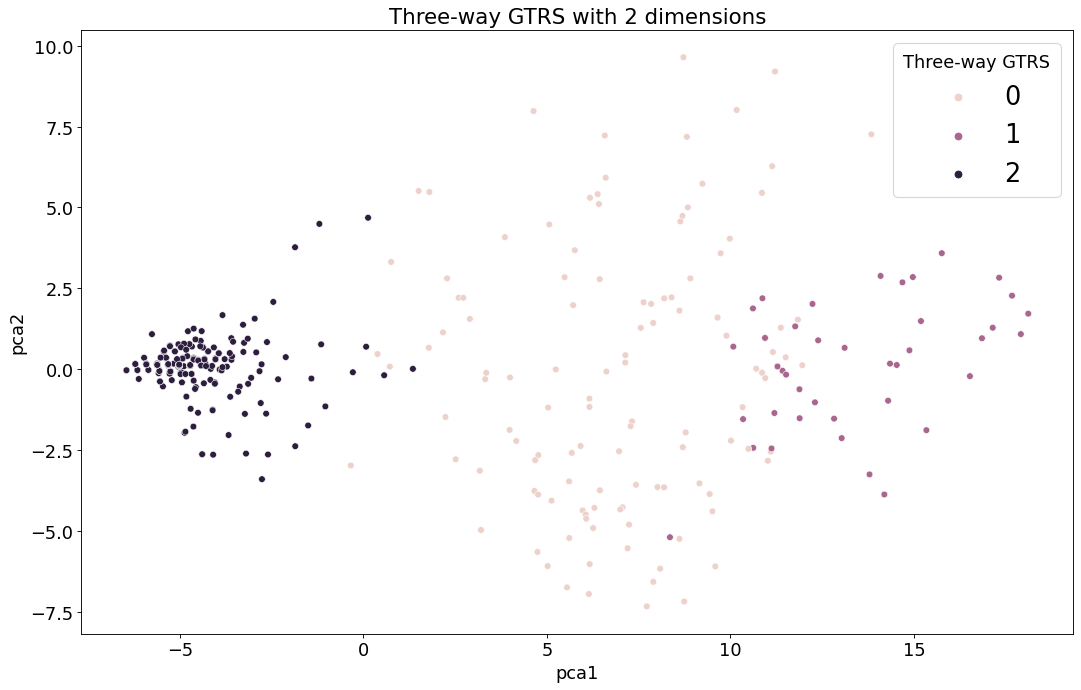

In [62]:
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(df_Um_visual.iloc[:, 1 : 10])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'], index=df_Um_visual.index)

sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results)
plt.title('Three-way GTRS with 2 dimensions')
plt.show()

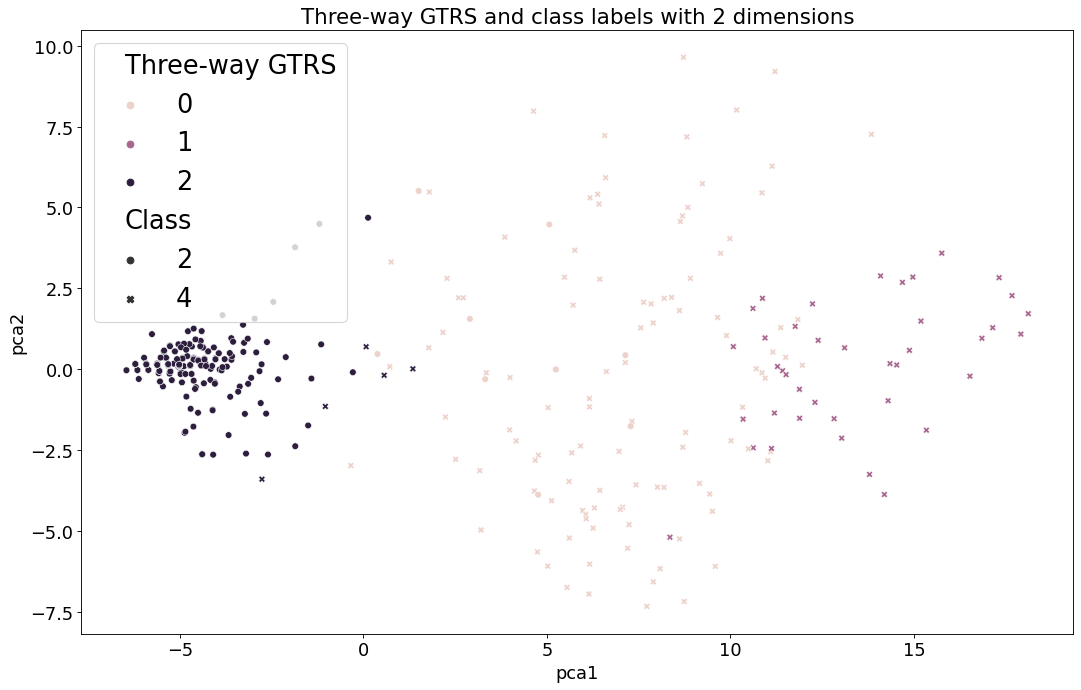

In [63]:
sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results, style=df_Um_visual.loc[: , 'Class'])
plt.title('Three-way GTRS and class labels with 2 dimensions')
plt.show()

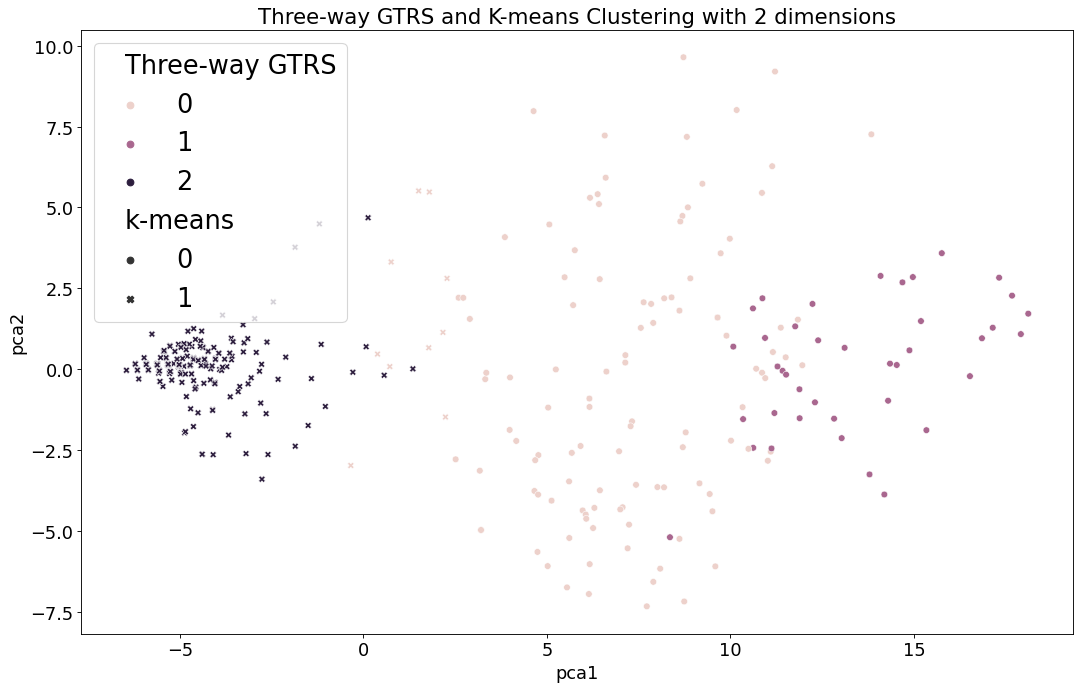

In [64]:
sns.scatterplot(x="pca1", y="pca2", hue=df_Um_visual.loc[: , 'Three-way GTRS'], data=results, style=df_Um_visual.loc[: , 'k-means'])
plt.title('Three-way GTRS and K-means Clustering with 2 dimensions')
plt.show()